In [1]:
import json
import os, sys, re
import numpy as np
import pickle as pkl

import tensorflow as tf
from char2vec.utils import *
from char2vec.embed import *

In [2]:
textrecog_decoded = pkl.load(open('textrecog_decoded.pkl','rb'))
target = pkl.load(open('target.pkl','rb'))

In [10]:
corpus = ''
for image_text in textrecog_decoded:
    text = ' '.join(image_text).strip()
    corpus += text + '\n'

In [13]:
with open('corpus.txt', 'w+') as f:
    f.write(corpus)

In [14]:
corpus_path = './corpus.txt'

## Create a model and train on the corpus:

In [3]:
CONFIG.show()

Showing CONFIG
  BATCH = 32
  D = 10
  GPU = False
  SHUFF_BUFFER = 10000
  TOTAL_STEPS = 30001
  WINDOW_SIZES = [1, 2, 3]


In [4]:
print('Alphabet:', ALPHABET.encode('utf-8'))
print('Unknown token rep:', '"~"')

Alphabet: b'abcdefghijklmnopqrstuvwxyz1234567890,.()[]"\' -\n'
Unknown token rep: "~"


In [15]:
m = Char2Vec(corpus_path, config=CONFIG, alphabet=ALPHABET, unk='~')

In [16]:
%timeit -n1 -r1 m.train()

Training 30001 steps with batch size 32...
Step       0:  loss=0.6930163502693176
Step    3000:  loss=0.08164297044277191
Step    6000:  loss=0.07831251621246338
Step    9000:  loss=0.07797279208898544
Step   12000:  loss=0.07654502987861633
Step   15000:  loss=0.08014878630638123
Step   18000:  loss=0.07808186858892441
Step   21000:  loss=0.07701840996742249
Step   24000:  loss=0.07673246413469315
Step   27000:  loss=0.07569865137338638
Step   30000:  loss=0.08100072294473648
Training 501 steps with batch size 512...
Step       0:  loss=0.07829119265079498
Step     500:  loss=0.07742830365896225
3min 29s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Visualize the embeddings:
The learned parameters can be accessed by m.U_ and m.W_. Here m.U_ is the embedding matrix, and m.W_ is the matrix to recover context vector from embedded representations.

In [17]:
U = m.U_

In [18]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [21]:
def scatter2d_with_annotation(arr, text, xcol=0, ycol=1, fontsize=7, show=False, adjust_text_boo=True, **kwargs):
    assert len(arr)==len(text)
    fig, ax = plt.subplots(**kwargs)
    xarr = arr[:, xcol]
    yarr = arr[:, ycol]
    plt_texts = []
    for i in range(len(text)):
        plt.scatter(xarr[i], yarr[i])
        plt_texts.append(plt.text(xarr[i], yarr[i], text[i], fontsize=fontsize))
    if adjust_text_boo:
        from adjustText import adjust_text
        adjust_text(plt_texts, arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))
    if show:
        plt.show()
    return fig, ax

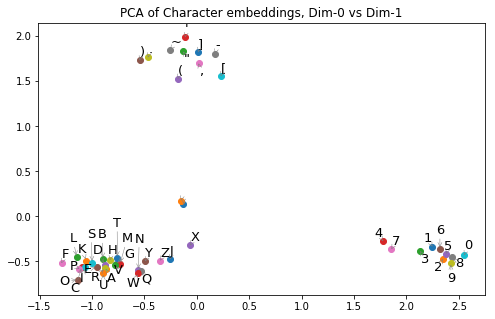

In [22]:
p = PCA()
U2 = p.fit_transform(U)
texts = m._tokenizer.alphabet + [m._tokenizer.unk]
fig, ax = scatter2d_with_annotation(
            U2, [s.upper() for s in texts],
            0,1,
            figsize=(8,5), fontsize=13)
plt.title('PCA of Character embeddings, Dim-0 vs Dim-1')
#plt.savefig('./PCA-0-1.png')
plt.show()

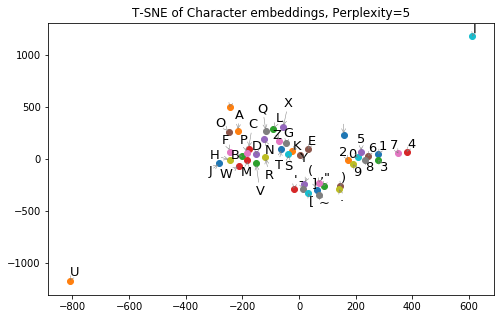

In [23]:
from sklearn.manifold import TSNE
U3 = TSNE(n_components=2, perplexity=5).fit_transform(U)
fig, ax = scatter2d_with_annotation(
            U3, [s.upper() for s in texts],
            0,1,
            figsize=(8,5), fontsize=13)
plt.title('T-SNE of Character embeddings, Perplexity=5')
#plt.savefig('./T-SNE_p5.png')
plt.show()